# 1. Data Exploration and Cleaning

## Objective
Load the diabetic_data.csv file, perform initial exploration, handle missing values, clean data types, and apply initial transformations.

### Input
- `data/raw/diabetic_data.csv`

### Output
- `data/processed/1_cleaned_data.csv`

---

In [1]:
# ==============================================================================
# SETUP CELL: Environment and Imports
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Set project root directory for robust path handling
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
DATA_DIR = os.path.join(PROJECT_ROOT, 'data')
RAW_DATA_DIR = os.path.join(DATA_DIR, 'raw')
PROCESSED_DATA_DIR = os.path.join(DATA_DIR, 'processed')
MODELS_DIR = os.path.join(PROJECT_ROOT, 'models')

# Ensure directories exist
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

print("Libraries imported and environment set successfully.")
print(f"Project Root: {PROJECT_ROOT}")

Libraries imported and environment set successfully.
Project Root: /home/ghost/workspace/university/machine_learning_and_computer_vision/assessment_main


## 1. Load Data

Load the diabetic dataset and examine its structure.

In [3]:
# Load the dataset
file_path = os.path.join(RAW_DATA_DIR, 'diabetic_data.csv')
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Display data types
print("\nData types:")
print(df.info())

Dataset shape: (101766, 50)
Number of columns: 50

Column names:
 1. encounter_id
 2. patient_nbr
 3. race
 4. gender
 5. age
 6. weight
 7. admission_type_id
 8. discharge_disposition_id
 9. admission_source_id
10. time_in_hospital
11. payer_code
12. medical_specialty
13. num_lab_procedures
14. num_procedures
15. num_medications
16. number_outpatient
17. number_emergency
18. number_inpatient
19. diag_1
20. diag_2
21. diag_3
22. number_diagnoses
23. max_glu_serum
24. A1Cresult
25. metformin
26. repaglinide
27. nateglinide
28. chlorpropamide
29. glimepiride
30. acetohexamide
31. glipizide
32. glyburide
33. tolbutamide
34. pioglitazone
35. rosiglitazone
36. acarbose
37. miglitol
38. troglitazone
39. tolazamide
40. examide
41. citoglipton
42. insulin
43. glyburide-metformin
44. glipizide-metformin
45. glimepiride-pioglitazone
46. metformin-rosiglitazone
47. metformin-pioglitazone
48. change
49. diabetesMed
50. readmitted

First 5 rows:
   encounter_id  patient_nbr             race  gender

## 2. Analyze Missing Values

Calculate and visualize missing value percentages for each column.

Missing Value Analysis:
                   Missing Count  Missing Percentage
weight                     98569           96.858479
max_glu_serum              96420           94.746772
A1Cresult                  84748           83.277322
medical_specialty          49949           49.082208
payer_code                 40256           39.557416
race                        2273            2.233555
diag_3                      1423            1.398306
diag_2                       358            0.351787
diag_1                        21            0.020636


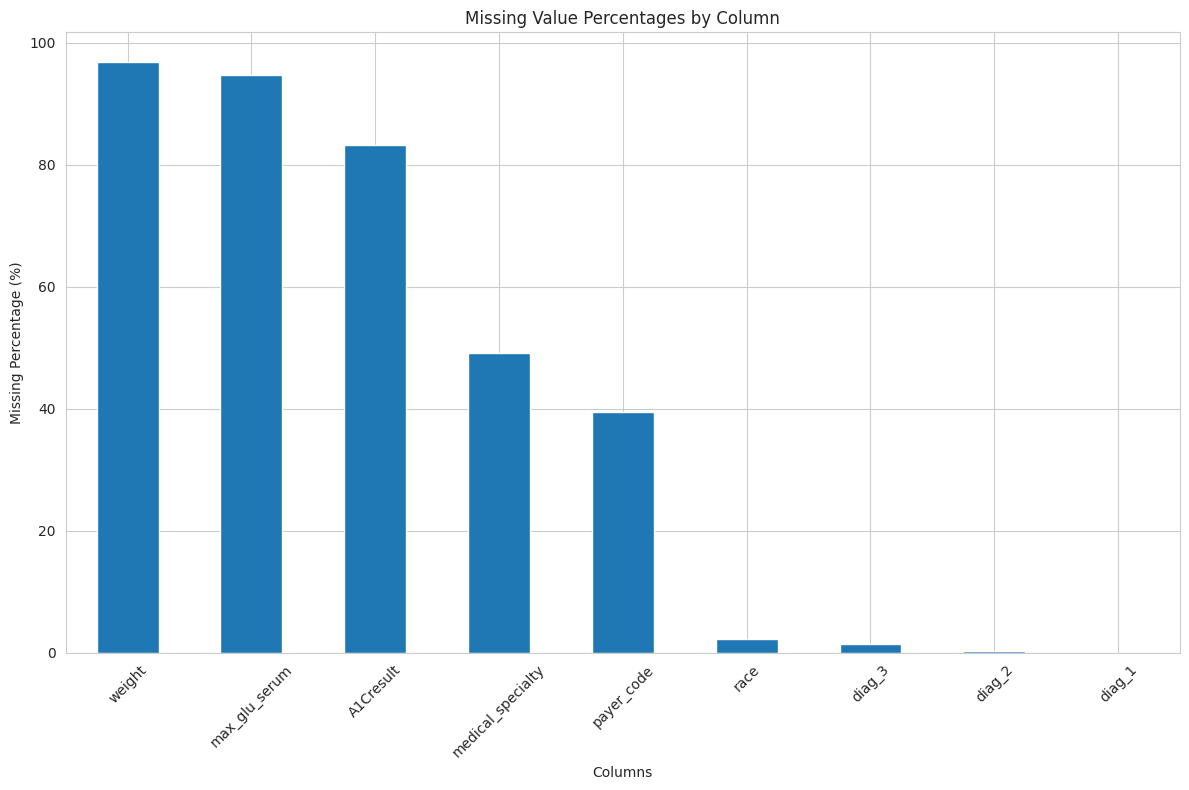

In [7]:
# Replace '?' with NaN for proper missing value handling
df.replace('?', np.nan, inplace=True)

# Calculate missing value percentages
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

# Create a DataFrame for missing value analysis
missing_analysis = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

# Sort by missing percentage (descending)
missing_analysis = missing_analysis.sort_values('Missing Percentage', ascending=False)

print("Missing Value Analysis:")
print(missing_analysis[missing_analysis['Missing Count'] > 0])

# Visualize missing values
plt.figure(figsize=(12, 8))
missing_analysis[missing_analysis['Missing Percentage'] > 0]['Missing Percentage'].plot(kind='bar')
plt.title('Missing Value Percentages by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../figures/data_exploration/missing_value_percentages.png", dpi=300, bbox_inches="tight")
plt.show()

## 3. Apply Exclusion Filter

Remove variables that are unsuitable for predictive modeling based on the analysis in task_1a.md.

In [8]:
# List of variables to exclude based on task_1a analysis
variables_to_exclude = ['encounter_id', 'patient_nbr', 'weight', 'payer_code']

print(f"Variables to exclude: {variables_to_exclude}")

# Drop the excluded variables
df_cleaned = df.drop(columns=variables_to_exclude)

print(f"Original shape: {df.shape}")
print(f"After exclusion shape: {df_cleaned.shape}")
print(f"Dropped columns: {set(df.columns) - set(df_cleaned.columns)}")

Variables to exclude: ['encounter_id', 'patient_nbr', 'weight', 'payer_code']
Original shape: (101766, 50)
After exclusion shape: (101766, 46)
Dropped columns: {'encounter_id', 'patient_nbr', 'weight', 'payer_code'}


## 4. Data Type Corrections

Convert data types to appropriate formats for analysis.

In [9]:
# Check current data types
print("Current data types:")
print(df_cleaned.dtypes)

# Convert age categories to numerical (if needed)
# Note: Age might be in ranges like '[0-10)', '[10-20)', etc.
# This will be handled in feature engineering step

# Convert readmitted to binary
if 'readmitted' in df_cleaned.columns:
    print(f"\nReadmitted unique values: {df_cleaned['readmitted'].unique()}")
    # Convert to binary: <30 = 1, >30 or NO = 0
    df_cleaned['readmitted_binary'] = df_cleaned['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
    print(f"\nReadmitted conversion:")
    print(df_cleaned['readmitted'].value_counts())
    print(df_cleaned['readmitted_binary'].value_counts())

Current data types:
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object


## 5. Save Cleaned Data

Save the cleaned dataset for the next step in the pipeline.

In [10]:
# Save the cleaned dataset
output_path = os.path.join(PROCESSED_DATA_DIR, '1_cleaned_data.csv')
df_cleaned.to_csv(output_path, index=False)

print(f"Cleaned data saved to: {output_path}")
print(f"Final dataset shape: {df_cleaned.shape}")
print(f"Final columns: {list(df_cleaned.columns)}")

Cleaned data saved to: /home/ghost/workspace/university/machine_learning_and_computer_vision/assessment_main/data/processed/1_cleaned_data.csv
Final dataset shape: (101766, 47)
Final columns: ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'readmitted_binary']
